In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[5]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['EPOSCurrent']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,EPOSCurrent_vCnt,EPOSCurrent_vFreq,EPOSCurrent_vMax,EPOSCurrent_vMin,EPOSCurrent_vStd,EPOSCurrent_vTrend,EPOSCurrent_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,76,7.531855,173.0,-51.0,29.756546,0.389870,8.407895
2,76,7.518368,136.0,-196.0,45.762764,-0.051292,0.921053
3,76,7.563048,171.0,-206.0,60.499094,-0.085154,3.565789
4,76,7.563380,235.0,-126.0,56.939577,-0.364470,6.328947


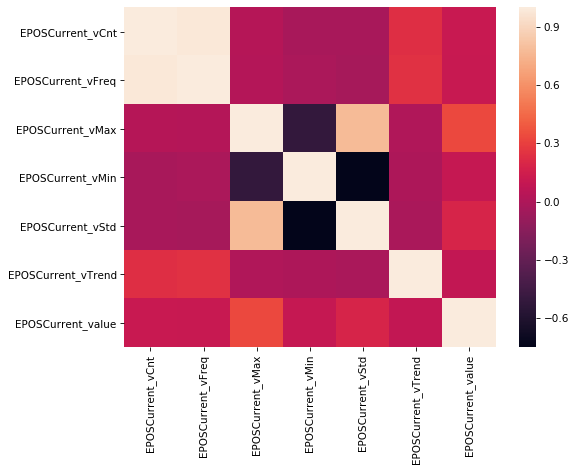

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

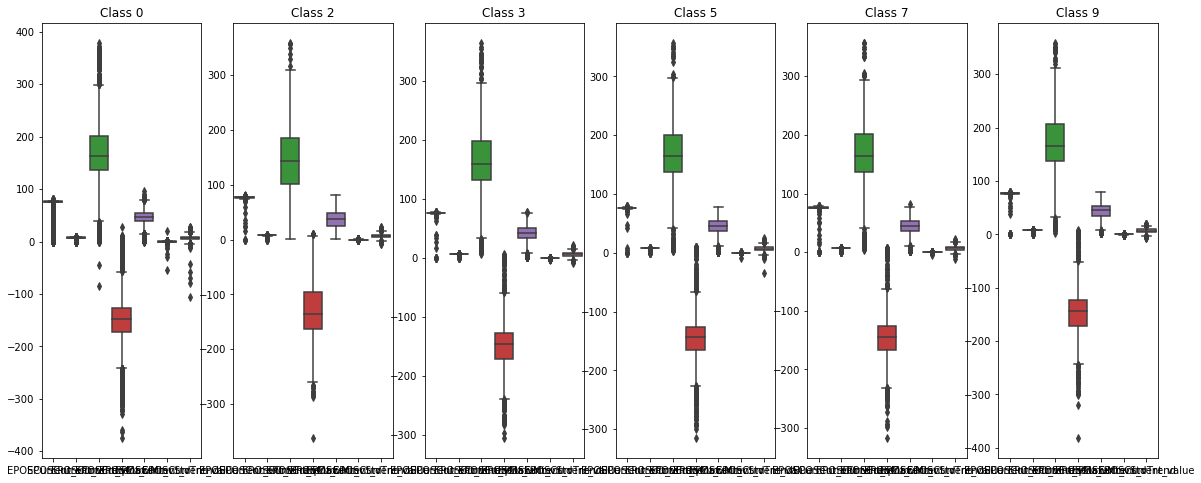

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


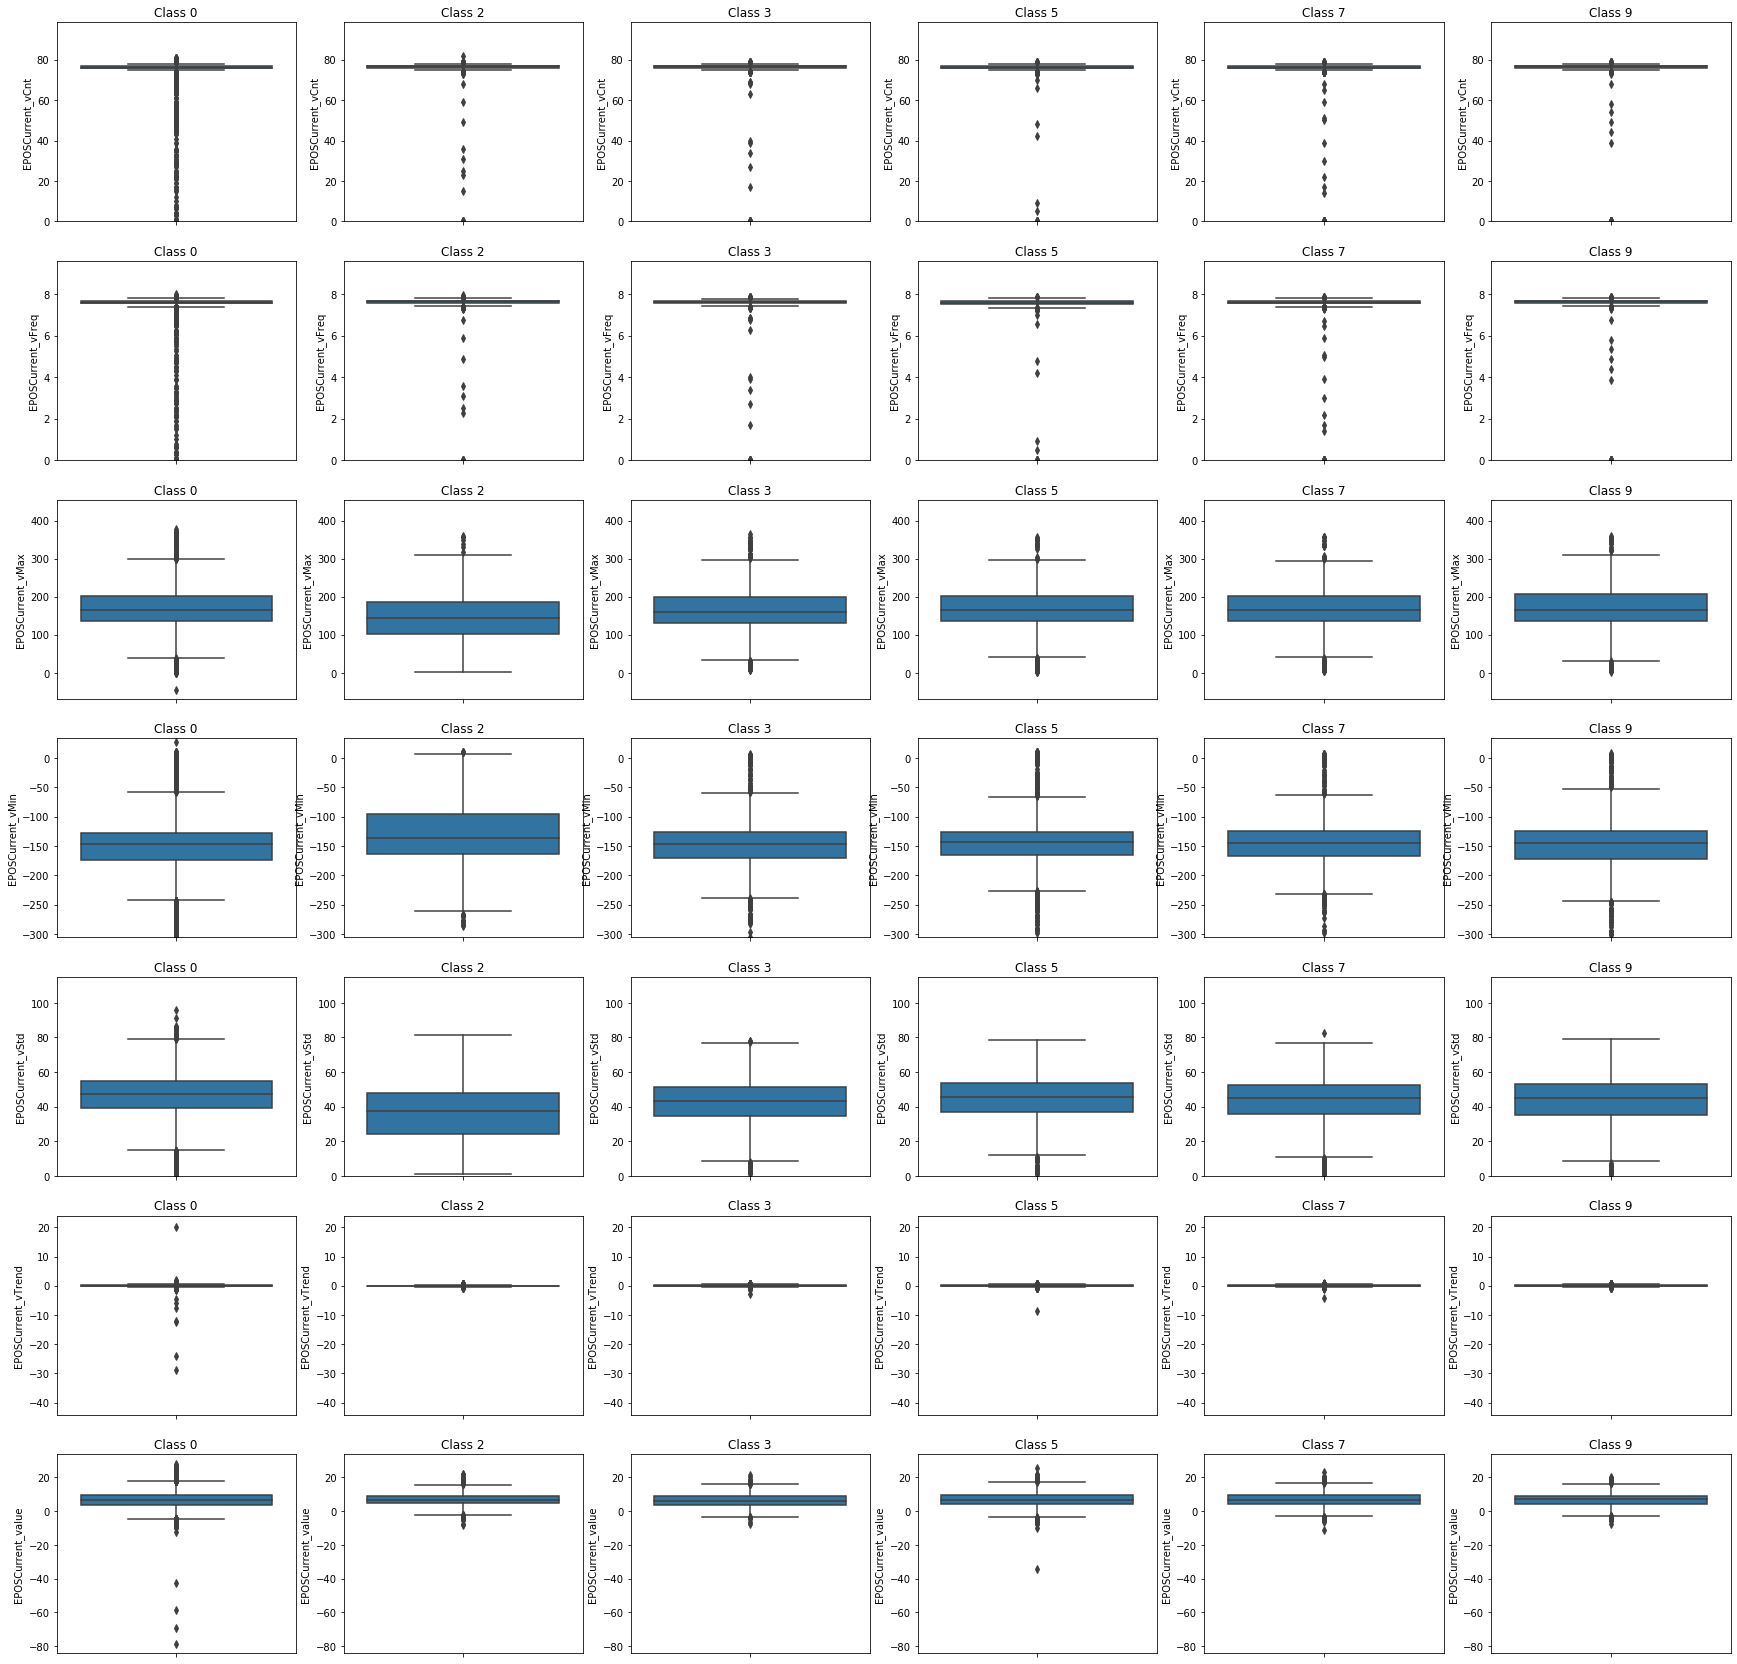

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [13]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,EPOSCurrent_vCnt,82.000000,0.000000,5.758917,76.010275,77.000000,39611,0
0,99,EPOSCurrent_vFreq,8.000199,0.000000,0.568684,7.564698,7.619498,39611,0
0,99,EPOSCurrent_vMax,379.000000,-85.000000,58.114708,163.148827,163.000000,39435,176
0,99,EPOSCurrent_vMin,28.000000,-382.000000,51.127718,-143.683302,-146.000000,39435,176
0,99,EPOSCurrent_vStd,95.701903,0.000000,14.954179,44.119304,46.223433,39435,176
0,99,EPOSCurrent_vTrend,20.000000,-55.200000,0.424509,-0.003968,-0.003838,39433,178
0,99,EPOSCurrent_value,28.000000,-105.333333,4.210464,6.728872,6.545455,39435,176


In [14]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 1 EPOSCurrent_vMax 363 [0, 1, 362]
NA at start or end
NA at start or end
0 1 EPOSCurrent_vMin 363 [0, 1, 362]
NA at start or

0 74 EPOSCurrent_vStd 360 [358, 359]
NA at start or end
0 74 EPOSCurrent_vTrend 360 [358, 359]
NA at start or end
0 74 EPOSCurrent_value 360 [358, 359]
NA at start or end
0 75 EPOSCurrent_vMax 361 [359, 360]
NA at start or end
0 75 EPOSCurrent_vMin 361 [359, 360]
NA at start or end
0 75 EPOSCurrent_vStd 361 [359, 360]
NA at start or end
0 75 EPOSCurrent_vTrend 361 [359, 360]
NA at start or end
0 75 EPOSCurrent_value 361 [359, 360]
NA at start or end
0 76 EPOSCurrent_vMax 358 [356, 357]
NA at start or end
0 76 EPOSCurrent_vMin 358 [356, 357]
NA at start or end
0 76 EPOSCurrent_vStd 358 [356, 357]
NA at start or end
0 76 EPOSCurrent_vTrend 358 [356, 357]
NA at start or end
0 76 EPOSCurrent_value 358 [356, 357]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 80 EPOSCurrent_vMax 360 [358, 359]
NA at start or end
0 80 EPOSCurrent_

NA at start or end
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
NA at start or end
NA at start or end
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 EPOSCurrent_value 370 [0, 1, 2, 3, 4, 5, 6, 7,